In [77]:
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats

In [78]:
def metropolis(start, value, proposal, niter, nburn=0, **kwargs):
    current = start
    post = [0]
    for i in range(niter):
        index = np.random.choice(8,2)
        proposed = proposal(current, **kwargs)
        p = value(current, **kwargs)
        p /= value(proposed, **kwargs)
        if np.random.uniform() > p:
            current = proposed
        else:
            current[index[0]][index[1]] = 0;
        post.append(round(np.sum(current)))
    return post[nburn:], current

In [79]:
def value(current, **kwargs):
    _ = kwargs
    return current.sum()

def proposal(current, **kwargs):
    _ = kwargs
    a = np.random.choice(8, 2)
    
    s = 0
    if a[0] != 0:
        s+= current[a[0] - 1][a[1]]
    if a[0]!= 7:
        s+= current[a[0] + 1][a[1]]
    if a[1]!= 0:
        s+= current[a[0]][a[1] - 1]
    if a[1]!= 7:
        s+= current[a[0]][a[1] + 1]
    
    if s == 0:
        current[a[0]][a[1]] = 1
    else:
        current[a[0]][a[1]] = 0
    return current

In [80]:
post, graph = metropolis(np.zeros((8, 8)), value, proposal, 100000)
print("Число закрашенных вершин", np.asarray(post).mean())

Число закрашенных вершин 15.19210807891921


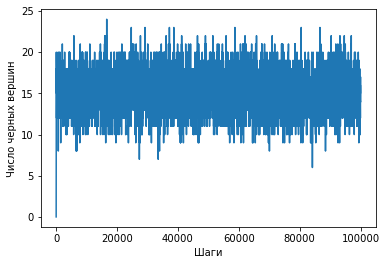

In [68]:
plt.plot(post)
plt.ylabel("Число черных вершин")
plt.xlabel("Шаги")
plt.show()

In [75]:
def g_test(x, start=0.1, end=0.5):
    return stats.ttest_ind(x[:int(len(x) * start)], x[-int(len(x) * end):], equal_var=False)

g_test(post[10000:])

Ttest_indResult(statistic=1.313305652295019, pvalue=0.18910311216476833)

Стационарность подтверждается

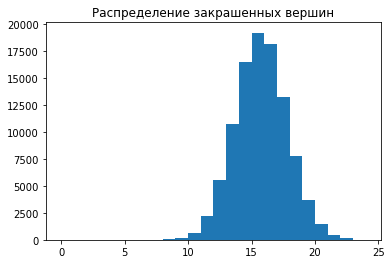

In [52]:
plt.hist(post, bins = np.arange(25))
plt.title("Распределение закрашенных вершин")
plt.show()

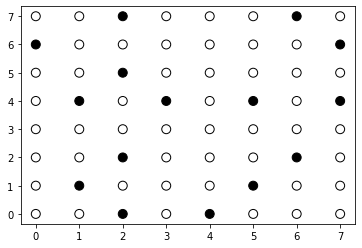

In [81]:
arr = graph.astype('bool')
colors = np.empty(arr.shape, dtype = 'U5')
colors[:] = 'w'
colors[arr] = 'black'
x, y = np.indices((arr.shape))
plt.scatter(x, y, c = colors.ravel(), edgecolors = 'black', s = 80)
plt.show()